In [4]:
# Hello Team, I am not creative enough for data visulaization
# Please help to create more interesting plots since I think our model won't be very complicated

# I started ploting unemployment rate, min wage, CPI, GDP, immigration data and business data
# please feel free to update anything 

# And delete all my comments at the end LOL !!!!!!!

In [5]:
import pandas as pd
data = pd.read_csv('../data/processed/combined_withNaN.csv')


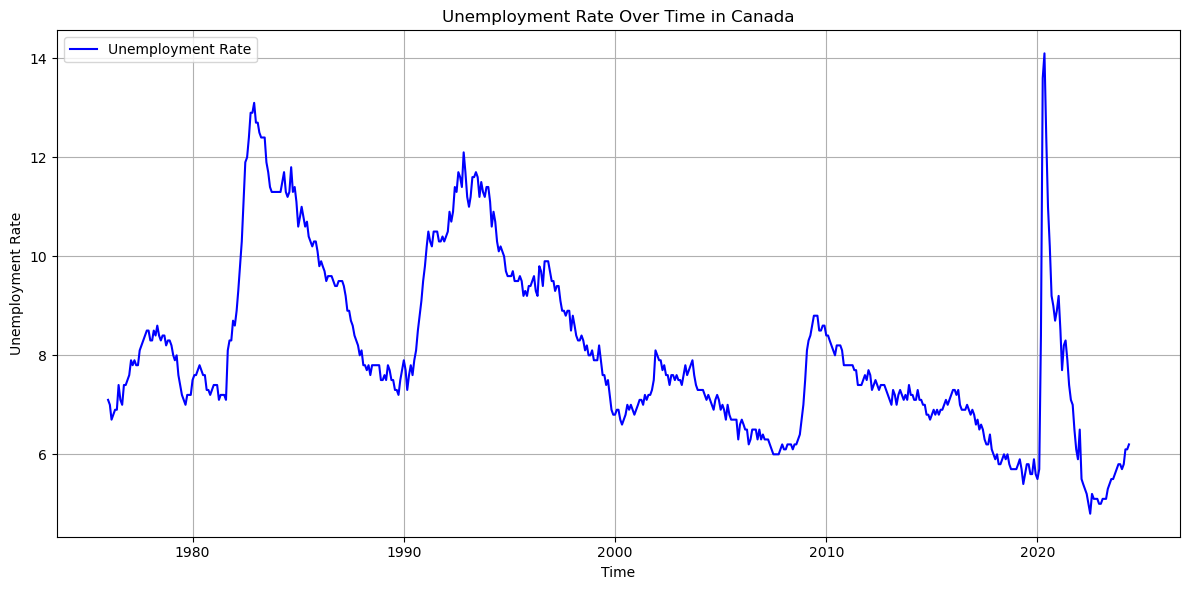

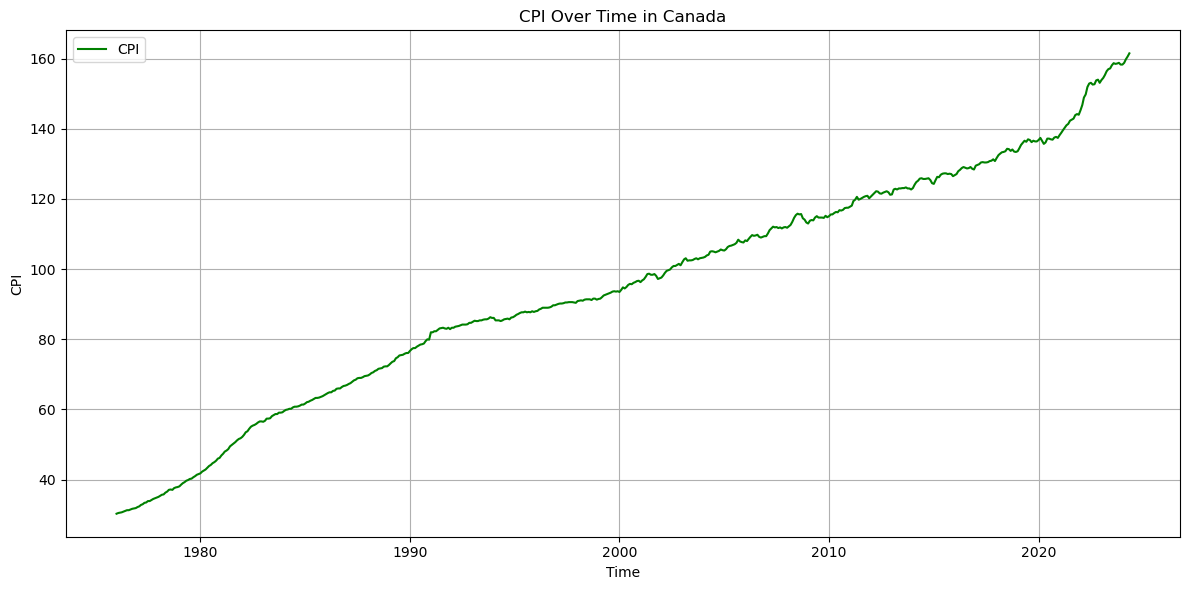

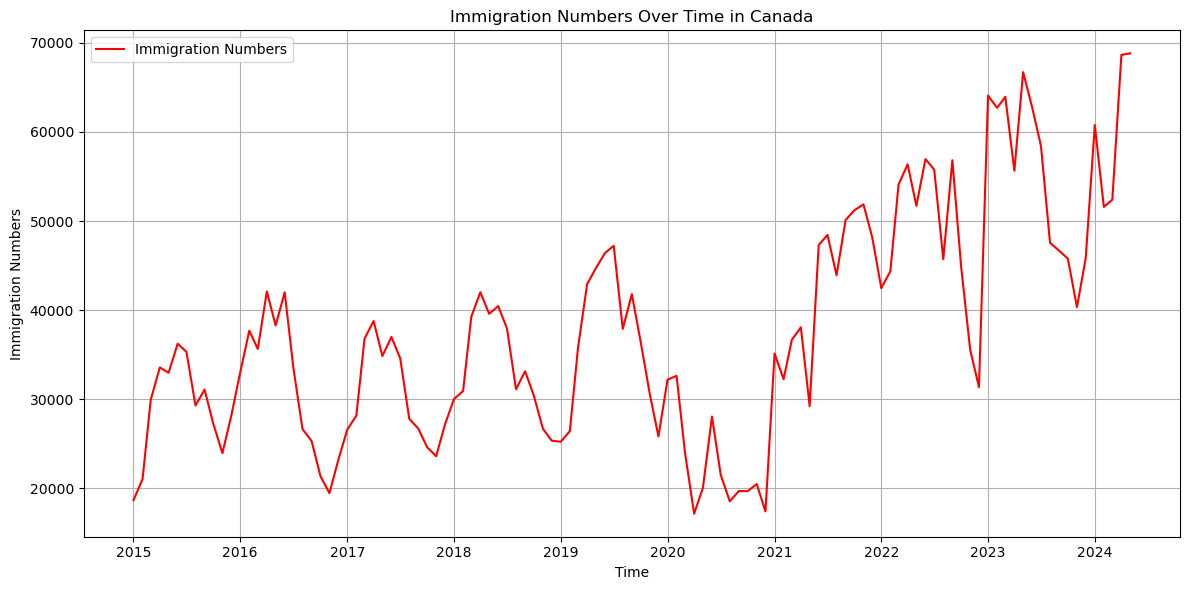

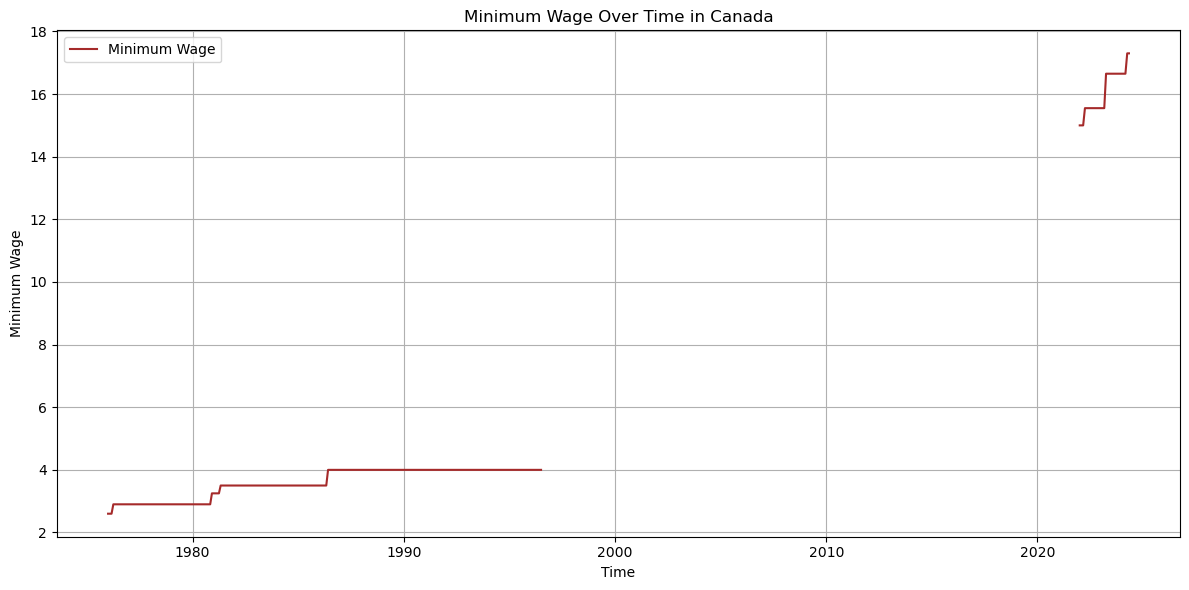

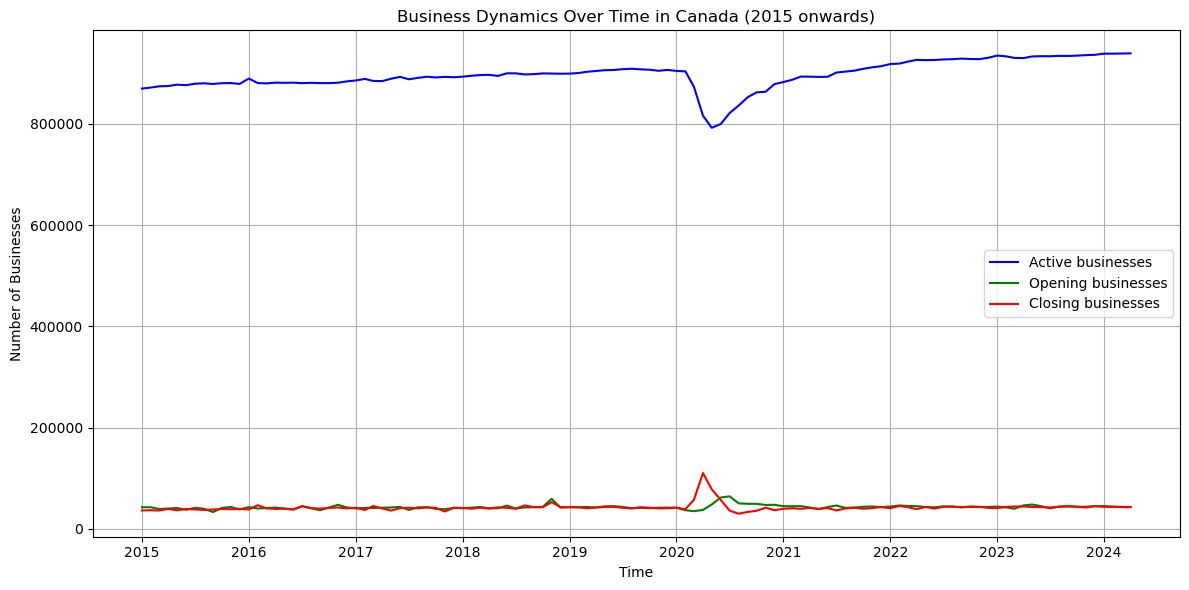

In [6]:
import matplotlib.pyplot as plt 

data['Month-Year'] = pd.to_datetime(data['Month-Year'], format='%b-%Y')

# Filter data for Canada only to simplify
canada_data = data[data['Province'] == 'Canada']

# Plot Unemployment Rate Over Time
plt.figure(figsize=(12, 6))
plt.plot(canada_data['Month-Year'], canada_data['Unemployment Rate'], label='Unemployment Rate', color='blue')
plt.title('Unemployment Rate Over Time in Canada')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot CPI Over Time
plt.figure(figsize=(12, 6))
plt.plot(canada_data['Month-Year'], canada_data['All-items CPI'], label='CPI', color='green')
plt.title('CPI Over Time in Canada')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Immigration Numbers Over Time
plt.figure(figsize=(12, 6))
plt.plot(canada_data['Month-Year'], canada_data['Immigration Num'], label='Immigration Numbers', color='red')
plt.title('Immigration Numbers Over Time in Canada')
plt.xlabel('Time')
plt.ylabel('Immigration Numbers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Minimum Wage Over Time
plt.figure(figsize=(12, 6))
plt.plot(canada_data['Month-Year'], canada_data['Minimum Wage'].str.replace('$', '').astype(float), label='Minimum Wage', color='brown')
plt.title('Minimum Wage Over Time in Canada')
plt.xlabel('Time')
plt.ylabel('Minimum Wage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Business Dynamics Over Time 
plt.figure(figsize=(12, 6))
plt.plot(canada_data['Month-Year'], canada_data['Active businesses'], label='Active businesses', color='blue')
plt.plot(canada_data['Month-Year'], canada_data['Opening businesses'], label='Opening businesses', color='green')
plt.plot(canada_data['Month-Year'], canada_data['Closing businesses'], label='Closing businesses', color='red')
plt.title('Business Dynamics Over Time in Canada (2015 onwards)')
plt.xlabel('Time')
plt.ylabel('Number of Businesses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

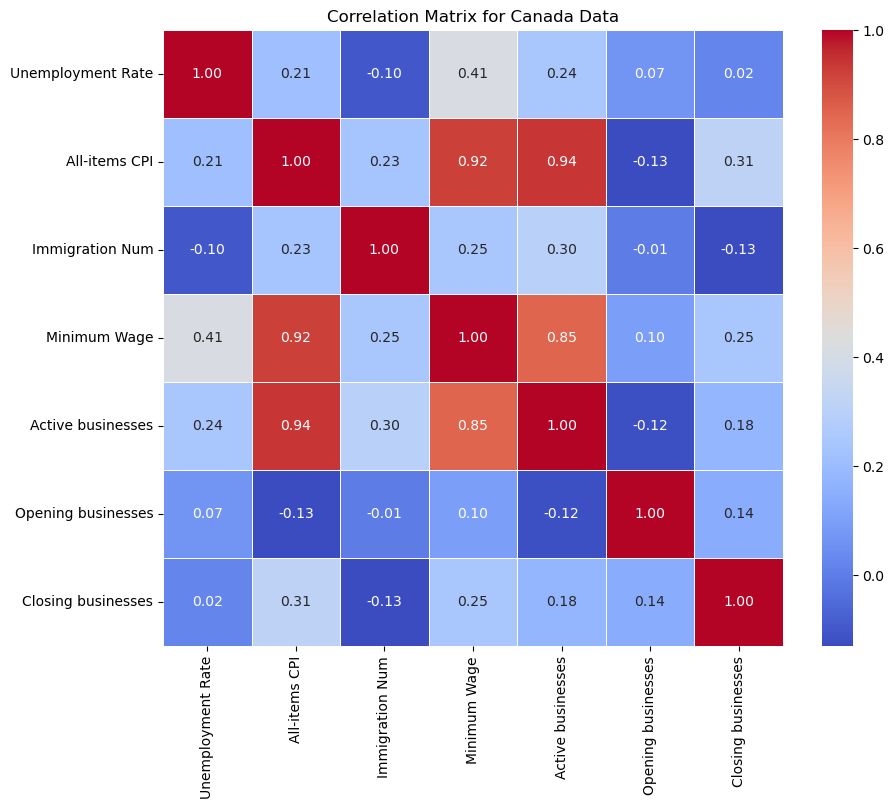

In [7]:
# Check Correlations between each variables
import seaborn as sns

canada_data = data[data['Province'] == 'Canada']

# Select relevant columns and drop rows with missing values
canada_data = canada_data[['Unemployment Rate', 'All-items CPI', 'Immigration Num', 'Minimum Wage', 'Active businesses', 'Opening businesses', 'Closing businesses']].dropna()

# Ensure the business dynamics columns are numeric
canada_data['Minimum Wage'] = canada_data['Minimum Wage'].str.replace('$', '').astype(float)

# Calculate the correlation matrix
correlation_matrix = canada_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Canada Data')
plt.show()

High Correlation \
All-items CPI and Active businesses:0.94\
All-items CPI and Minimum Wage: 0.92\
Minimum Wage and Active businesses: 0.85 \


In [9]:
# for linear model, I starts with Unemployment Rate∼Minimum Wage+Active Businesses+(Minimum Wage×Active Businesses)
import statsmodels.api as sm

# Create the interaction term
canada_data['MinWage_ActiveBusiness'] = canada_data['Minimum Wage'] * canada_data['Active businesses']

# Define the predictors and response variable
X = canada_data[['Minimum Wage', 'Active businesses', 'MinWage_ActiveBusiness']]
y = canada_data['Unemployment Rate']

# Add a constant to the predictors (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     26.27
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           9.33e-08
Time:                        23:47:44   Log-Likelihood:                 6.5883
No. Observations:                  28   AIC:                            -5.177
Df Residuals:                      24   BIC:                            0.1523
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1324